In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

In [3]:
import ipywidgets as widgets
import folium 
import webbrowser

In [10]:
health_df = pd.read_pickle("data/cleaned_npi_taxonomy_names_cbsa_pickle.csv")
health_df.head()

,from_npi,to_npi,patient_count,transaction_count,average_day_wait,from_specialty,CBSA,to_organization,from_provider_name,from_state
0,1033194220,1003000308,62,80,26.175,"Radiology, Diagnostic Radiology",12060.0,"BUCKHEAD EAR, NOSE AND THROAT","JACOBS, LOUIS",GA
1,1295734820,1003000308,46,52,49.462,Cardiovascular Disease,12060.0,"BUCKHEAD EAR, NOSE AND THROAT","ARNOLD, WILLIAM",GA
2,1295734820,1003000308,46,52,49.462,Cardiovascular Disease,12060.0,"BUCKHEAD EAR, NOSE AND THROAT","ARNOLD, WILLIAM",GA
3,1518973437,1003000308,44,51,33.843,Cardiovascular Disease,12060.0,"BUCKHEAD EAR, NOSE AND THROAT","COOK, ARTHUR",GA
4,1518973437,1003000308,44,51,33.843,Cardiovascular Disease,12060.0,"BUCKHEAD EAR, NOSE AND THROAT","COOK, ARTHUR",GA


In [22]:
health_10

,from_npi,to_npi,patient_count,transaction_count,average_day_wait,from_specialty,CBSA,to_organization,from_provider_name,from_state
999469,1093753303,1003863580,102736,185910,0.000,"Pathology, Anatomic Pathology & Clinical Patho...",34980.0,ASSOCIATED PATHOLOGISTS LLC DBA PATHGROUP,"WELCH, DEREK",TN
1296335,1073551222,1811069685,25290,64142,0.001,"Pathology, Anatomic Pathology",17460.0,CLEVELAND CLINIC,"MARCHANT, KANDICE",OH
4230392,1376591388,1588640692,27422,53891,0.323,"Pathology, Blood Banking & Transfusion Medicine",12060.0,EMORY UNIVERSITY HOSPITAL,"ROBACK, JOHN",GA
3842201,1922084904,1558332494,18281,52528,0.001,"Pathology, Clinical Pathology",38060.0,MAYO CLINIC SCOTTSDALE,"HERNANDEZ, JAMES",AZ
7395280,1629168679,1649414285,25692,50685,0.000,"Pathology, Anatomic Pathology & Clinical Patho...",16700.0,ROPER ST FRANCIS PHYSICIAN PARTNERS LABORATORY,"MCEVOY, DANYEL",SC
429766,1790725364,1700865094,45187,50301,0.000,"Radiology, Diagnostic Radiology",31080.0,MOBILEXUSA,"LIU, JASON",CA
5460691,1275621542,1245355270,14425,35455,0.000,Cardiovascular Disease,35620.0,CORNELL UNIVERSITY MEDICAL COLLEGE ECG,"OKIN, PETER",NY
5460690,1275621542,1245355270,14425,35455,0.000,Cardiovascular Disease,35620.0,CORNELL UNIVERSITY MEDICAL COLLEGE ECG,"OKIN, PETER",NY
4028139,1922084904,1154392231,14135,33770,8.177,"Pathology, Clinical Pathology",38060.0,MAYO CLINIC HOSPITAL,"HERNANDEZ, JAMES",AZ
4559447,1518023035,1154653947,11940,31765,10.794,"Pathology, Anatomic Pathology & Clinical Patho...",16580.0,CARLE PHYSICIAN GROUP,"UZOARU, IKECHUKWU",IL


C:\Users\DP\Anaconda3\lib\site-packages\matplotlib\tight_layout.py:176: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  warnings.warn('Tight layout not applied. The left and right margins '


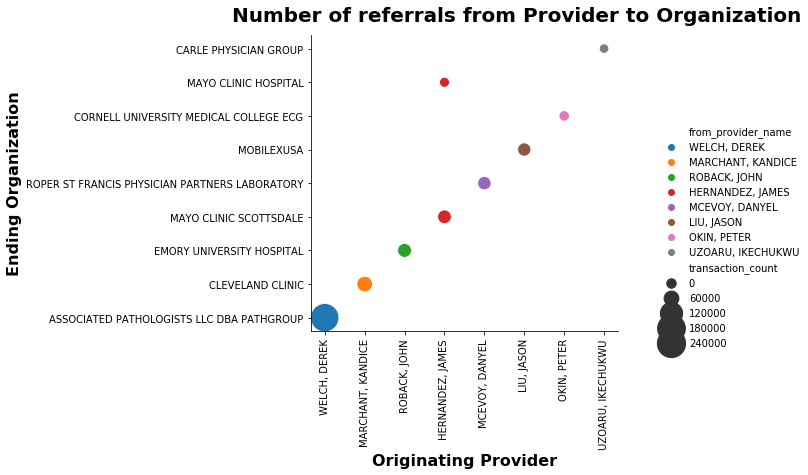

In [27]:
#health_10 = health_df.sort_values('transaction_count', ascending = False).dropna(subset=['to_organization']).head(10)

#health_10.from_provider_name.astype('category')


g= sns.relplot(x="from_provider_name", y="to_organization", hue="from_provider_name", size="transaction_count", sizes=(90, 800), data=health_10)
g.set_xticklabels(rotation=90)
g.axes[0,0].set_xlabel('Originating Provider', size = 16, weight = 'bold')
g.axes[0,0].set_ylabel('Ending Organization', size = 16, weight = 'bold')
plt.subplots_adjust(top=0.9)
g.fig.suptitle("Number of referrals from Provider to Organization", size = 20, weight = 'bold');

In [16]:
health_df['to_organization'].describe()

count                       3452582
unique                        71068
top       AMERICAN MEDICAL RESPONSE
freq                          16720
Name: to_organization, dtype: object

In [ ]:
sns.relplot(x="from_provider_name", y="to_organization", hue="from_provider_name", size="transaction_count",
            sizes=(40, 400), alpha=.5, palette="muted",
            height=6, data=health_10)

##Top 5 Doctor Referrals

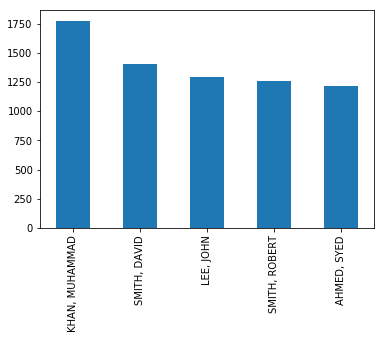

In [14]:
health_df['from_provider_name'].value_counts().sort_values(ascending=False).head().plot('bar')

In [7]:
latitude = 37.0902
longitude = -95.7129
health_map = folium.Map(location=[latitude, longitude], zoom_start=4)
health_map

In [8]:
geo = pd.read_csv("data/Geospatial.State.csv")

In [29]:
geo_health = pd.merge(health_df, geo, left_on=['from_state'], right_on=['state'],
                 how='left')
geo_health.head()

,from_npi,to_npi,patient_count,transaction_count,average_day_wait,from_specialty,CBSA,to_organization,from_provider_name,from_state,state,latitude,longitude,name
0,1033194220,1003000308,62,80,26.175,"Radiology, Diagnostic Radiology",12060.0,"BUCKHEAD EAR, NOSE AND THROAT","JACOBS, LOUIS",GA,GA,32.157435,-82.907123,Georgia
1,1295734820,1003000308,46,52,49.462,Cardiovascular Disease,12060.0,"BUCKHEAD EAR, NOSE AND THROAT","ARNOLD, WILLIAM",GA,GA,32.157435,-82.907123,Georgia
2,1295734820,1003000308,46,52,49.462,Cardiovascular Disease,12060.0,"BUCKHEAD EAR, NOSE AND THROAT","ARNOLD, WILLIAM",GA,GA,32.157435,-82.907123,Georgia
3,1518973437,1003000308,44,51,33.843,Cardiovascular Disease,12060.0,"BUCKHEAD EAR, NOSE AND THROAT","COOK, ARTHUR",GA,GA,32.157435,-82.907123,Georgia
4,1518973437,1003000308,44,51,33.843,Cardiovascular Disease,12060.0,"BUCKHEAD EAR, NOSE AND THROAT","COOK, ARTHUR",GA,GA,32.157435,-82.907123,Georgia


In [ ]:
for lat, lon, geo_health, city in zip(geo_health['latitude'], geo_health['longitude'], geo_health['from_provider_name'], geo_health['state'], geo_health['transaction_count']):
    folium.CircleMarker(
        [lat, lon],
        radius=.15*geo_health['transaction_count'],
        popup = ('State: ' + str(state).capitalize() + '<br>'
                 'Provider: ' + str(from_provider_name) + '<br>'
                 'Traffic level: ' + str(traffic) +'%'
                ),
        color='b',
        key_on = traffic_q,
        threshold_scale=[0,1,2,3],
        fill_color=colordict[traffic_q],
        fill=True,
        fill_opacity=0.7
        ).add_to(traffic_map)
traffic_map